In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 100
nx = 1
ny = 1

x = torch.unsqueeze(torch.linspace(-3, 3, N), dim=1)
y = torch.sin(x) + 0.1 * torch.randn(x.size())
# y = x.pow(2) + 0.2 * torch.rand(x.size())
x.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

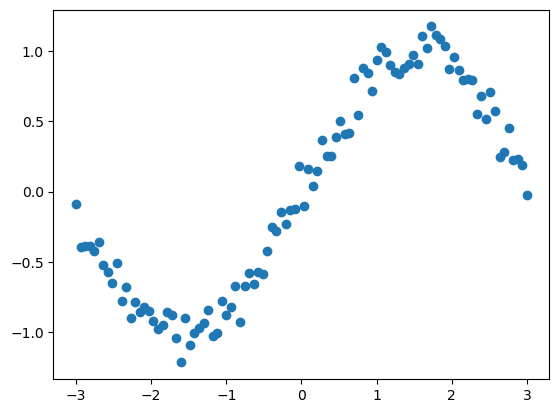

In [3]:
plt.plot(x, y, 'o');

In [4]:
class NN(torch.nn.Module):
    def __init__(self, nx, n1, ny, activation_function):
        super(NN, self).__init__()
        self.activation_function = activation_function
        self.layer1 = torch.nn.Linear(nx, n1)
        self.layer2 = torch.nn.Linear(n1, ny)
        
    def forward(self, x):
        x = self.activation_function(self.layer1(x))
        x = self.layer2(x)
        return x

In [5]:
n1 = 10
activation_function = F.relu

num_epochs = 100
learning_rate = 0.2

model = NN(nx, n1, ny, activation_function)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

losses = []
for _ in range(num_epochs):
    yhat = model(x)
    
    loss = criterion(yhat, y)
    losses.append(loss.detach().item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

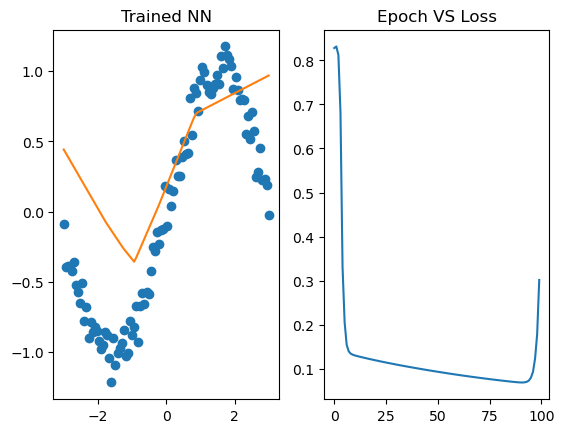

In [6]:
_, axes = plt.subplots(1, 2)

axes[0].plot(x, y, 'o')
axes[0].plot(x, yhat.detach().numpy())
axes[0].set_title("Trained NN")

axes[1].plot(losses)
axes[1].set_title("Epoch VS Loss");

In [7]:
n1 = 10
activation_function = F.relu

num_epochs = 100
learning_rate = 0.2

model = NN(nx, n1, ny, activation_function)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

losses = []
for _ in range(num_epochs):
    for xi, yi in zip(x, y):
        yhati = model(xi)
        
        lossi = criterion(yhati, yi)
        losses.append(lossi.detach().item())
        
        optimizer.zero_grad()
        lossi.backward()
        optimizer.step()

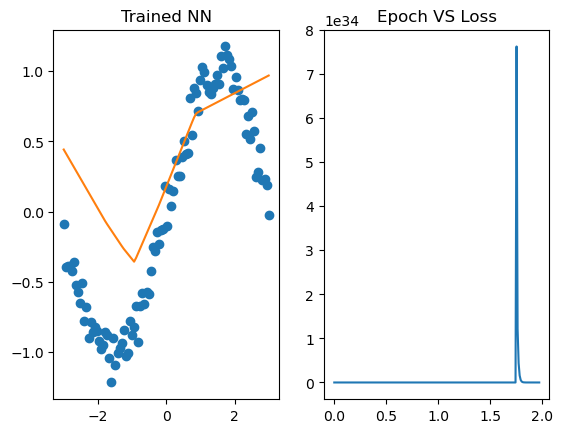

In [8]:
_, axes = plt.subplots(1, 2)

axes[0].plot(x, y, 'o')
axes[0].plot(x, yhat.detach().numpy())
axes[0].set_title("Trained NN")

axes[1].plot(list(torch.linspace(0, N-1, len(losses))), losses)
axes[1].set_title("Epoch VS Loss");

In [9]:
n1 = 10
activation_function = F.relu

num_epochs = 100
learning_rate = 0.2

batch_size = 16
num_batches = x.shape[0] // batch_size

model = NN(nx, n1, ny, activation_function)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

losses = []
for _ in range(num_epochs):
    shuffled_indices = torch.randperm(x.shape[0])
    
    for batch in range(num_batches):
        
        xb = x[shuffled_indices[batch*batch_size:batch*batch_size+batch_size]]
        yb = y[shuffled_indices[batch*batch_size:batch*batch_size+batch_size]]
        
        yhatb = model(xb)
        lossb = criterion(yhatb, yb)
        losses.append(lossb.detach().item())
        
        optimizer.zero_grad()
        lossb.backward()
        optimizer.step()

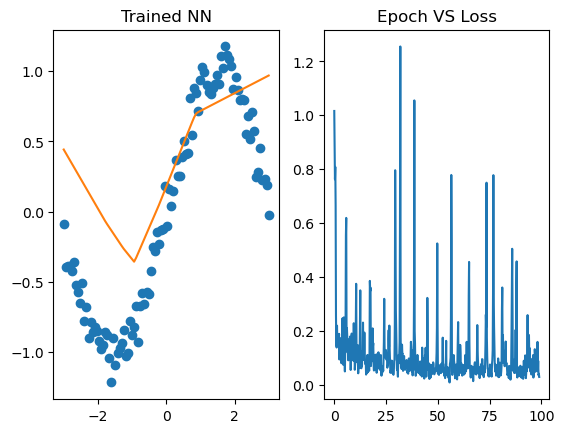

In [10]:
_, axes = plt.subplots(1, 2)

axes[0].plot(x, y, 'o')
axes[0].plot(x, yhat.detach().numpy())
axes[0].set_title("Trained NN")

axes[1].plot(list(torch.linspace(0, N-1, len(losses))), losses)
axes[1].set_title("Epoch VS Loss");